<a href="https://colab.research.google.com/github/YasserJxxxx/MNIST_CRISP_DM/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Conectando a Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Configurando Rutas ---
Archivos del modelo se guardarán en: /content/drive/MyDrive/mnist_cnn_proyecto/mnist_cnn_model.keras
Datos de feedback se guardarán en: /content/drive/MyDrive/mnist_cnn_proyecto/feedback_data.npz

--- Cargando y Preparando Dataset MNIST ---
Forma de x_train_full: (60000, 28, 28, 1)
Forma de x_test: (10000, 28, 28, 1)

--- Cargando o Entrenando Modelo ---
✅ Cargando modelo existente desde: /content/drive/MyDrive/mnist_cnn_proyecto/mnist_cnn_model.keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)


--- Cargando Datos de Feedback Anteriores ---
Cargando datos de feedback anteriores...
Total de correcciones guardadas: 3

--- Métricas Actuales del Modelo ---
Pérdida (Test): 1.6436
Precisión (Test): 54.69%

--- INICIANDO PRUEBA INTERACTIVA (Feedback) ---


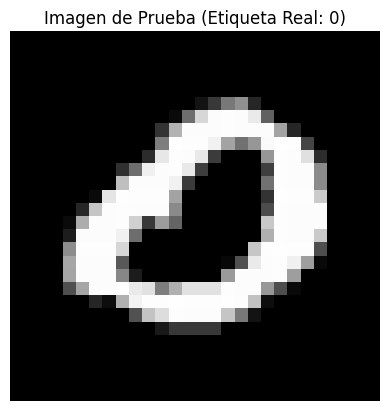

--- Predicción del Modelo ---
El modelo predice: 6
Confianza: 86.79%
¿Es esta predicción correcta? (s/n): s
¡Genial! 🎉 El modelo acertó.

--- INICIANDO PRUEBA CON IMAGEN PROPIA ---
Sube una imagen de un dígito (fondo blanco, dígito negro):


Saving 5.jpeg to 5.jpeg

--- ¡Predicción Completa! ---


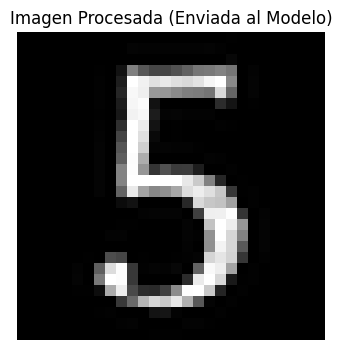

El modelo predice: 5
Confianza: 50.52%

--- VERIFICANDO RE-ENTRENAMIENTO MASIVO OPCIONAL ---
Re-entrenando con las 3 correcciones acumuladas...
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 9.5439e-05 - val_accuracy: 0.5299 - val_loss: 1.7195
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 1.1785e-04 - val_accuracy: 0.5127 - val_loss: 1.8050
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 4.2412e-04 - val_accuracy: 0.4913 - val_loss: 1.8972
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 3.0362e-04 - val_accuracy: 0.4719 - val_loss: 1.9927
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 0.4555 - val_loss: 2.0727
Modelo guardado tras re-entrenamiento masivo.

--- FIN DEL SCRIPT ---


In [9]:
# ----------------------------------------------------------------------
# PASO 1 y 2: IMPORTAR LIBRERÍAS Y CONECTAR GOOGLE DRIVE
# ----------------------------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive, files
from PIL import Image, ImageOps
import io

print("--- Conectando a Google Drive ---")
# Montamos Google Drive
drive.mount('/content/drive')


# ----------------------------------------------------------------------
# PASO 3: DEFINIR RUTAS Y CONSTANTES
# ----------------------------------------------------------------------
print("\n--- Configurando Rutas ---")
# Ruta en tu Google Drive donde se guardará todo
DRIVE_PATH = "/content/drive/MyDrive/mnist_cnn_proyecto"
MODEL_PATH = os.path.join(DRIVE_PATH, "mnist_cnn_model.keras")
FEEDBACK_DATA_PATH = os.path.join(DRIVE_PATH, "feedback_data.npz")

# Asegurarse de que el directorio exista
os.makedirs(DRIVE_PATH, exist_ok=True)

print(f"Archivos del modelo se guardarán en: {MODEL_PATH}")
print(f"Datos de feedback se guardarán en: {FEEDBACK_DATA_PATH}")


# ----------------------------------------------------------------------
# PASO 4: CARGAR Y PREPARAR LOS DATOS (MNIST)
# ----------------------------------------------------------------------
print("\n--- Cargando y Preparando Dataset MNIST ---")
# Cargar datos originales
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

# Función de pre-procesamiento
def preprocess_images(images):
    images = images.astype("float32") / 255.0
    images = np.expand_dims(images, -1) # Añadir canal (28, 28) -> (28, 28, 1)
    return images

# Pre-procesar los datos
x_train_full_processed = preprocess_images(x_train_full)
x_test_processed = preprocess_images(x_test)

print(f"Forma de x_train_full: {x_train_full_processed.shape}")
print(f"Forma de x_test: {x_test_processed.shape}")


# ----------------------------------------------------------------------
# PASO 5: DEFINIR LA ARQUITECTURA DE LA CNN
# ----------------------------------------------------------------------
def create_cnn_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax") # 10 clases (0-9)
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


# ----------------------------------------------------------------------
# PASO 6: CARGAR MODELO O ENTRENAR
# ----------------------------------------------------------------------
print("\n--- Cargando o Entrenando Modelo ---")
if os.path.exists(MODEL_PATH):
    print(f"✅ Cargando modelo existente desde: {MODEL_PATH}")
    model = keras.models.load_model(MODEL_PATH)
else:
    print(f"⏳ No se encontró modelo. Creando y entrenando uno nuevo...")
    model = create_cnn_model()

    # Entrenar el modelo nuevo
    history = model.fit(
        x_train_full_processed,
        y_train_full,
        batch_size=128,
        epochs=15, # 15 épocas es un buen inicio para MNIST
        validation_split=0.1
    )

    # Guardar el modelo recién entrenado
    model.save(MODEL_PATH)
    print(f"✅ Modelo nuevo entrenado y guardado en: {MODEL_PATH}")

# Mostrar un resumen de la arquitectura del modelo
model.summary()


# ----------------------------------------------------------------------
# PASO 7: CARGAR DATOS DE RETROALIMENTACIÓN ANTERIORES
# ----------------------------------------------------------------------
print("\n--- Cargando Datos de Feedback Anteriores ---")
if os.path.exists(FEEDBACK_DATA_PATH):
    print("Cargando datos de feedback anteriores...")
    feedback_data = np.load(FEEDBACK_DATA_PATH)
    feedback_images = list(feedback_data['images'])
    feedback_labels = list(feedback_data['labels'])
else:
    print("No se encontraron datos de feedback. Empezando de cero.")
    feedback_images = []
    feedback_labels = []

print(f"Total de correcciones guardadas: {len(feedback_labels)}")


# ----------------------------------------------------------------------
# PASO 8: MOSTRAR MÉTRICAS ACTUALES DEL MODELO
# ----------------------------------------------------------------------
print("\n--- Métricas Actuales del Modelo ---")
score = model.evaluate(x_test_processed, y_test, verbose=0)
print(f"Pérdida (Test): {score[0]:.4f}")
print(f"Precisión (Test): {score[1] * 100:.2f}%")


# ----------------------------------------------------------------------
# PASO 9: FUNCIÓN INTERACTIVA DE PRUEBA Y MEJORA
# ----------------------------------------------------------------------
def probar_y_mejorar_modelo():
    global model, feedback_images, feedback_labels, score # Para poder modificarlas

    print("\n--- INICIANDO PRUEBA INTERACTIVA (Feedback) ---")

    # 1. Seleccionar una imagen de prueba aleatoria
    idx = np.random.randint(0, x_test.shape[0])
    test_image = x_test[idx] # Imagen original (para mostrar)
    test_image_processed = x_test_processed[idx] # Imagen procesada (para predecir)
    true_label = y_test[idx]

    # 2. Mostrar la imagen
    plt.imshow(test_image, cmap='gray')
    plt.title(f"Imagen de Prueba (Etiqueta Real: {true_label})")
    plt.axis('off')
    plt.show()

    # 3. Realizar la predicción
    img_batch = np.expand_dims(test_image_processed, axis=0)
    prediction = model.predict(img_batch, verbose=0)

    predicted_label = np.argmax(prediction[0])
    confidence = np.max(prediction[0]) * 100

    print(f"--- Predicción del Modelo ---")
    print(f"El modelo predice: {predicted_label}")
    print(f"Confianza: {confidence:.2f}%")

    # 4. Pedir retroalimentación (feedback)
    feedback = input("¿Es esta predicción correcta? (s/n): ").lower().strip()

    if feedback == 's':
        print("¡Genial! 🎉 El modelo acertó.")

    elif feedback == 'n':
        print("¡Oh no! Gracias por la corrección.")
        try:
            # 5. Pedir la etiqueta correcta
            correct_label_str = input("¿Cuál era el dígito correcto? (0-9): ").strip()
            correct_label = int(correct_label_str)

            if 0 <= correct_label <= 9:
                # 6. Almacenar la corrección
                feedback_images.append(test_image_processed)
                feedback_labels.append(correct_label)
                np.savez(FEEDBACK_DATA_PATH,
                         images=np.array(feedback_images),
                         labels=np.array(feedback_labels))
                print(f"Corrección ({correct_label}) guardada en Drive.")

                # 7. Re-entrenar (Fine-Tuning)
                print("Re-entrenando el modelo con la nueva información...")
                retrain_img = np.expand_dims(test_image_processed, axis=0)
                retrain_label = np.array([correct_label])
                model.fit(retrain_img, retrain_label, epochs=2, batch_size=1, verbose=0)

                # 8. Guardar el modelo mejorado
                model.save(MODEL_PATH)
                print("¡Modelo mejorado y guardado en Drive! 🧠")

                # 9. Mostrar nuevas métricas
                print("Evaluando rendimiento actualizado...")
                new_score = model.evaluate(x_test_processed, y_test, verbose=0)
                print(f"Precisión anterior: {score[1] * 100:.2f}%")
                print(f"Nueva Precisión (Test): {new_score[1] * 100:.2f}%")
                score = new_score # Actualizar score global
            else:
                print("Entrada inválida. Debe ser un número entre 0 y 9.")
        except ValueError:
            print("Entrada no válida. No se re-entrenará esta vez.")
    else:
        print("Respuesta no reconocida. Omitiendo.")

# ----------------------------------------------------------------------
# PASO 10: FUNCIÓN PARA PREDECIR IMAGEN PROPIA
# ----------------------------------------------------------------------
def predecir_mi_imagen():
    global model
    print("\n--- INICIANDO PRUEBA CON IMAGEN PROPIA ---")

    # 1. Cargar el archivo
    print("Sube una imagen de un dígito (fondo blanco, dígito negro):")
    uploaded = files.upload()

    if not uploaded:
        print("No se subió ningún archivo.")
        return

    filename = next(iter(uploaded))

    # 2. Leer y procesar la imagen con PIL
    try:
        img = Image.open(io.BytesIO(uploaded[filename]))

        # Convertir a escala de grises
        img_gray = img.convert('L')

        # Invertir colores ( crucial: MNIST es blanco sobre negro)
        img_inverted = ImageOps.invert(img_gray)

        # Redimensionar a 28x28 (tamaño de MNIST)
        img_resized = img_inverted.resize((28, 28), Image.Resampling.LANCZOS)

        # 3. Convertir a formato Numpy
        img_array = np.array(img_resized)

        # 4. Pre-procesar para el modelo
        img_processed = img_array.astype("float32") / 255.0

        # Añadir dimensiones de batch (1) y canal (1)
        img_batch = np.expand_dims(img_processed, axis=0) # (1, 28, 28)
        img_batch = np.expand_dims(img_batch, axis=-1)   # (1, 28, 28, 1)

        if img_batch.shape != (1, 28, 28, 1):
             raise ValueError(f"La forma final de la imagen es incorrecta: {img_batch.shape}")

        # 5. Realizar predicción
        prediction = model.predict(img_batch, verbose=0)
        predicted_label = np.argmax(prediction[0])
        confidence = np.max(prediction[0]) * 100

        # 6. Mostrar resultados
        print("\n--- ¡Predicción Completa! ---")
        plt.figure(figsize=(4, 4))
        plt.imshow(img_processed, cmap='gray')
        plt.title(f"Imagen Procesada (Enviada al Modelo)")
        plt.axis('off')
        plt.show()

        print(f"El modelo predice: {predicted_label}")
        print(f"Confianza: {confidence:.2f}%")

    except Exception as e:
        print(f"Error procesando la imagen: {e}")
        print("Asegúrate de subir un archivo de imagen válido (png, jpg, etc.).")


# ----------------------------------------------------------------------
# EJECUCIÓN PRINCIPAL
# ----------------------------------------------------------------------

# 1. Ejecutar la prueba interactiva con datos de Test
probar_y_mejorar_modelo()

# 2. Ejecutar la prueba con una imagen propia
predecir_mi_imagen()


# 3. (Opcional) Re-entrenamiento masivo con todo el feedback acumulado
print("\n--- VERIFICANDO RE-ENTRENAMIENTO MASIVO OPCIONAL ---")
if len(feedback_labels) > 0:
    print(f"Re-entrenando con las {len(feedback_labels)} correcciones acumuladas...")
    model.fit(np.array(feedback_images),
              np.array(feedback_labels),
              epochs=5,
              batch_size=32,
              validation_data=(x_test_processed, y_test))
    model.save(MODEL_PATH)
    print("Modelo guardado tras re-entrenamiento masivo.")
else:
    print("No hay datos de feedback para re-entrenamiento masivo.")

print("\n--- FIN DEL SCRIPT ---")